# III Neuroniniai tinklai

## Temos

<code>**1  : Kodėl jiem mums reikalingi**</code><br>
<code>**2  : Neuroninio tinklo modeliai, istorija**</code><br>


Tai gana sena idėja ir šiandien tai yra naujausia technika, skirta daugeliui įvairių mašininio mokymosi problemų. Mes jau turime tiesinę ir logistinę regresiją, todėl natūraliai galite pagalvoti, kam gy reikalingi neuroniniai tinklai. Norėdami tai suprasti, turime pažvelgti į sudėtingą netiesinę hipotezę. Ankstesnėse paskaitose mes aprarinėjome tiesines hipotezes, tokias kaip <code>**tiesinė regresija, daugiamatė tiesinė regresija ir logistinė regresija**</code>. Tai naudingi algoritmai gebantis spręsti daugeli problemų, tačiau vis tiek jų galios nepakanka, kad išspręstų sunkias problemas. Netiesinės klasifikacijos problemos yra viena iš tų, kurių negalima lengvai išspręsti naudojant vien tiesinius metodus.

<code>**Tiesinis logistinės regresijos modelis**</code>

\begin{multline*}
h_{\theta}(x) = g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} +  + \theta_{n}x_{n})
\end{multline*}


Jei turime tokį štai duomenų rinkinį:

In [55]:
import warnings
warnings.filterwarnings('ignore')

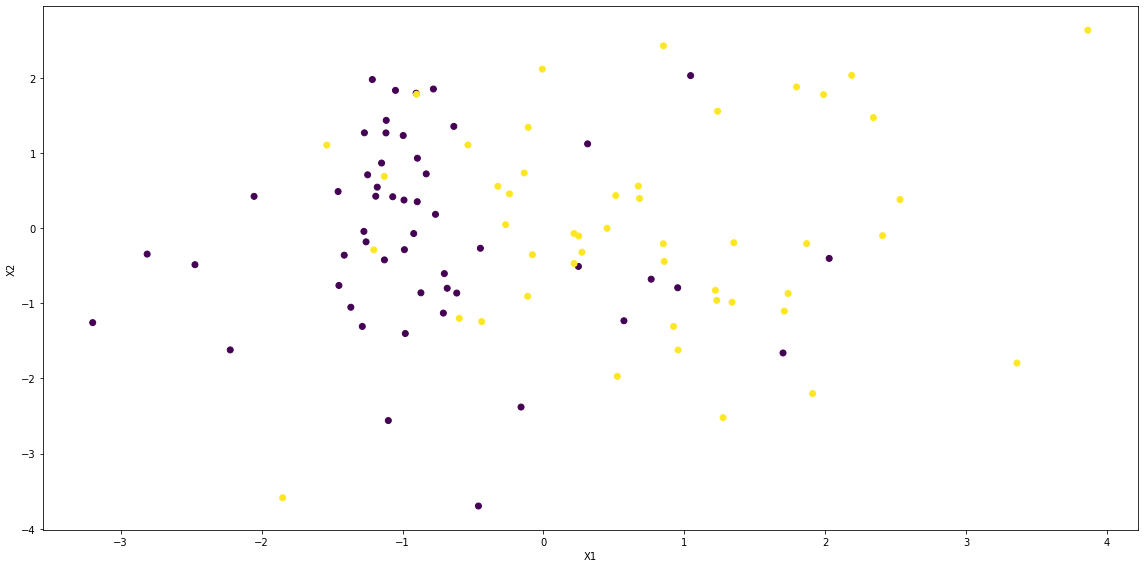

In [48]:
%run ../scripts/_nn_I_load_data.py

ir norime pritaikyti logistinę regresiją šiam uždaviniui spręsti, ką galėtume padaryti tai pritaikyti logistinę regresiją su daugybę <code>**netiesinių savybių (polinomų)**</code>

<code>**Ne tiesinis logistinės regresijos modelis**</code>

\begin{multline*}
h_{\theta}(x) = g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}x_{2} + \theta_{4}x_{1}^2x_{2} + \theta_{5}x_{1}^{3}x_{2} + \theta_{6}x_{1}x_{2}^{2} + \ ...)
\end{multline*}

Jei įtrauksime daug polinomų terminų, tokių kaip aukščiau, ir jei to pakanka, galbūt galime gauti hipotezę, kuri tuos pavyzdžius atskirtų nuo skirtingų klasių. Ir šis metodas veiks gerai, kai turime <code>**dvi savybės x1, x2**</code>, tada galime įtraukti visus tuos x1, x2 daugianario (polinomo) terminus. Tačiau daugeliui mašininio mokymosi problemų bus daug daugiau savybių nei dvi.<br>

Netiesinė forma yra sudėtingesnė, nes joje yra daug daugianario terminų. Tačiau kai funkcijų skaičius yra didelis, aukščiau pateiktas sprendimas nėra geras pasirinkimas norint išmokti sudėtingos netiesinės hipotezės. Isivaizduokite jei yra <code>**100 savybių**</code> ir jei įtrauktume visus šių savybių kvadratinius terminus, jų būtų labai daug ir tai tik tų kurie yra antros eilės daugianario terminai.

\begin{multline*}
x_{1}^{2}, x_{1}x_{2}, x_{1}x_{3}, x_{1}x_{4}, \ ... \ , x_{1}x_{100}
\end{multline*}

\begin{multline*}
x_{2}^{2}, x_{2}x_{3}, x_{2}x_{4}, x_{2}x_{5}, \ ... \ , x_{2}x_{100}
\end{multline*}

Ir jei įtrauksime tik antros eilės terminus, tai yra terminai, kurie yra dviejų terminų sandauga. Tada tuo atveju, kai <code>**n = 100**</code>, gauname apie ≈ 5000 savybių. Kvadratinių ypatybių skaičius apytiksliai didėja tokia tvarka <code>**O(n²)**</code>, šiuo konkrečiu atveju, arčiau <code>**≈ n² / 2**</code>.<br>

Visų kvadratinių savybių įtraukimas neatrodo racionalus kelias, tai bus savybių/funkcijų ir mes galime per daug pritaikyti modelį prie duomenų rinkinio, o dar svarbiau, kad tai gali būti labai brangus <code>**skaičiavimai**</code>. su tiek daug savybių/funkcijų.<br>

Vienas dalykas ką dar galėtume padaryti, tai įtraukti tik šių kai kurių poaibį, galbūt tik su originaliomis savybėmis:

\begin{multline*}
x_{1}^{2}, x_{2}^{2}, x_{3}^{2} \ ... \ , x_{100}^{2}
\end{multline*}

Tada savybių/funkcijų skaičius bus daug mažesnis. Tačiau tai nėra pakankamai savybių ir ta tikrai <code>**neleis mums pritaikyti modelį prie sudėtingų duomenų rinkinio**</code>. Jei įtrauksime tik šias kvadratinias išraiškas kartu su pradinėmis išraiškomis, panašu kad mūsų hipotezę bus elipsė.

5000 savybių atrodo daug, jei įtrauktume kiekvienos ypatybės kubinius (trečios eilės polinomus).
\begin{multline*}
x_{1}x_{2}x_{3}, x_{1}^{2}x_{2}, x_{10}x_{11}x_{13} \ ...
\end{multline*}

Šių savybių bus daug, jos apytiksliai didėja tokia tvarka <code>**O(n³)**</code>, todėl jei n = 100 galime apskaičiuoti, kad gausime <code>**≈ 200 000**</code> tokių kubinių savybių. Įtraukus šias aukštesnės eilės daugianario ypatybes, kai mūsų pradinis savyvių rinkinys yra ir taip didelis, tai tikrai dramatiškai išplės savybių erdvę. <code>**Tai nėra geras būdas kuriant netiesinius klasifikatorius, kai n yra didelis**</code>

Daugeliui mašininio mokymosi problemų n bus gana didelis. Tarkime kompiuterinio matymo problemos.
Jeigu norime naudoti mašininį mokymąsi, kad išmokytume klasifikatorių ištirti vaizdą ir pasakyti, ar vaizde yra žmogaus, ar ne. Daugelis žmonių šiaip jau stebisi, kodėl kompiuterinė rega tokia sudėtinga ir ne visai tiksli. Turiu galvoje, kai visi žiūrime į šią nuotrauką, taip akivaizdu, kas tai yra. Taigi, kaip mokymosi algoritmas gali nesuprasti kas čia yra šioje nuotraukoje.

dtype of matrix members: uint8
shape of matrix:(551, 920, 3)


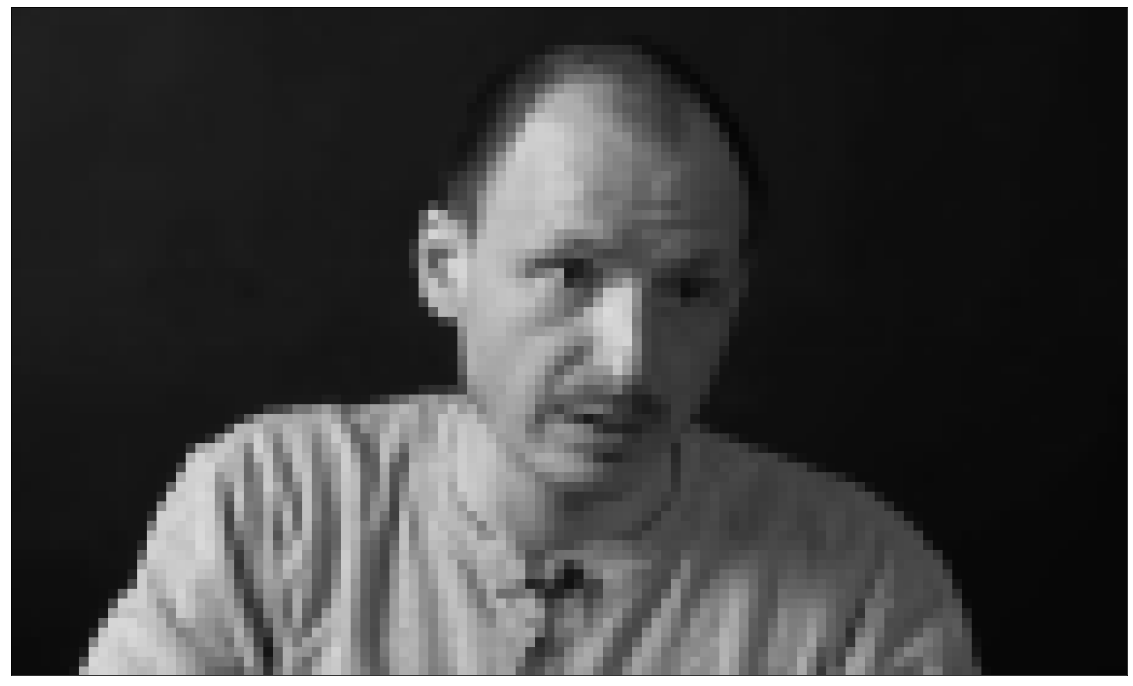

In [94]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as img

img = img.imread('img/i_as_a_sample.jpg')

print(f'dtype of matrix members: {img.dtype}')
print(f'shape of matrix:{img.shape}')

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.xticks([])
plt.yticks([]);

Norėdami suprasti problema, kad turime priartinti nedidelę vaizdo dalį, pavyzdžiui, sritį. Tarkime, kur jūs ir aš matome veidą, kompiuteris mato matricą arba pikselių intensyvumo verčių tinklelį, nurodantį kiekvieno vaizdo pikselio ryškumą. Problema pažvelgus į šią pikselių intensyvumo verčių matricą reikia pasakyti kad šie skaičiai reiškia žmogaus akį.

In [102]:
np.set_printoptions(threshold=np.inf)
img[25:35, 50:55, 1]

array([[30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [31, 31, 31, 31, 31],
       [31, 31, 31, 31, 31],
       [31, 31, 31, 31, 31]], dtype=uint8)

<div class="alert alert-block alert-success">

<h2>Klasės pratimas </h2>
    
Ar čia žmogaus akis: ?
 
\begin{multline*}
\begin{bmatrix}
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
31 & 31 &  31&  31 &  31 \\
31 & 31 &  31&  31 &  31 \\
31 & 31 &  31&  31 &  31 \\
\end{bmatrix}
\end{multline*}
</div>

Kad suprastume, kodėl mums reikia <code>**netiesinės hipotezės**</code>, pažvelkime į kai kuriuos žmogaus veido vaizdus ir ne veidus, kuriuos galėtume įtraukti į duomenų rinkini mokymosi algoritmui. Pažymėkime kai kurias taškų vietas vaizde ir  šie taškai turi tam tikrą intensyvumo reiškmę. Tą patį padarykime su kitais žmogaus veido atvaizdo pavyzdžiais. Kai turime daug duomenų pavyzdžių (žmonių ir ne žmonių veidų), galų gale gauname, kad ne žmonių veidų tie taškai  turi galbūti skirtingą intesvumą todėl patys taškai bus skirtinguose savybių erdvės regionuose. Ir čia mums reikia tam tikros netiesinės hipotezės, kad pabandytume atskirti šias dvi klases.

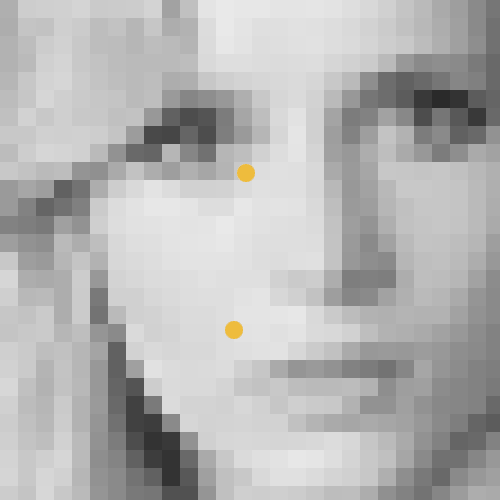

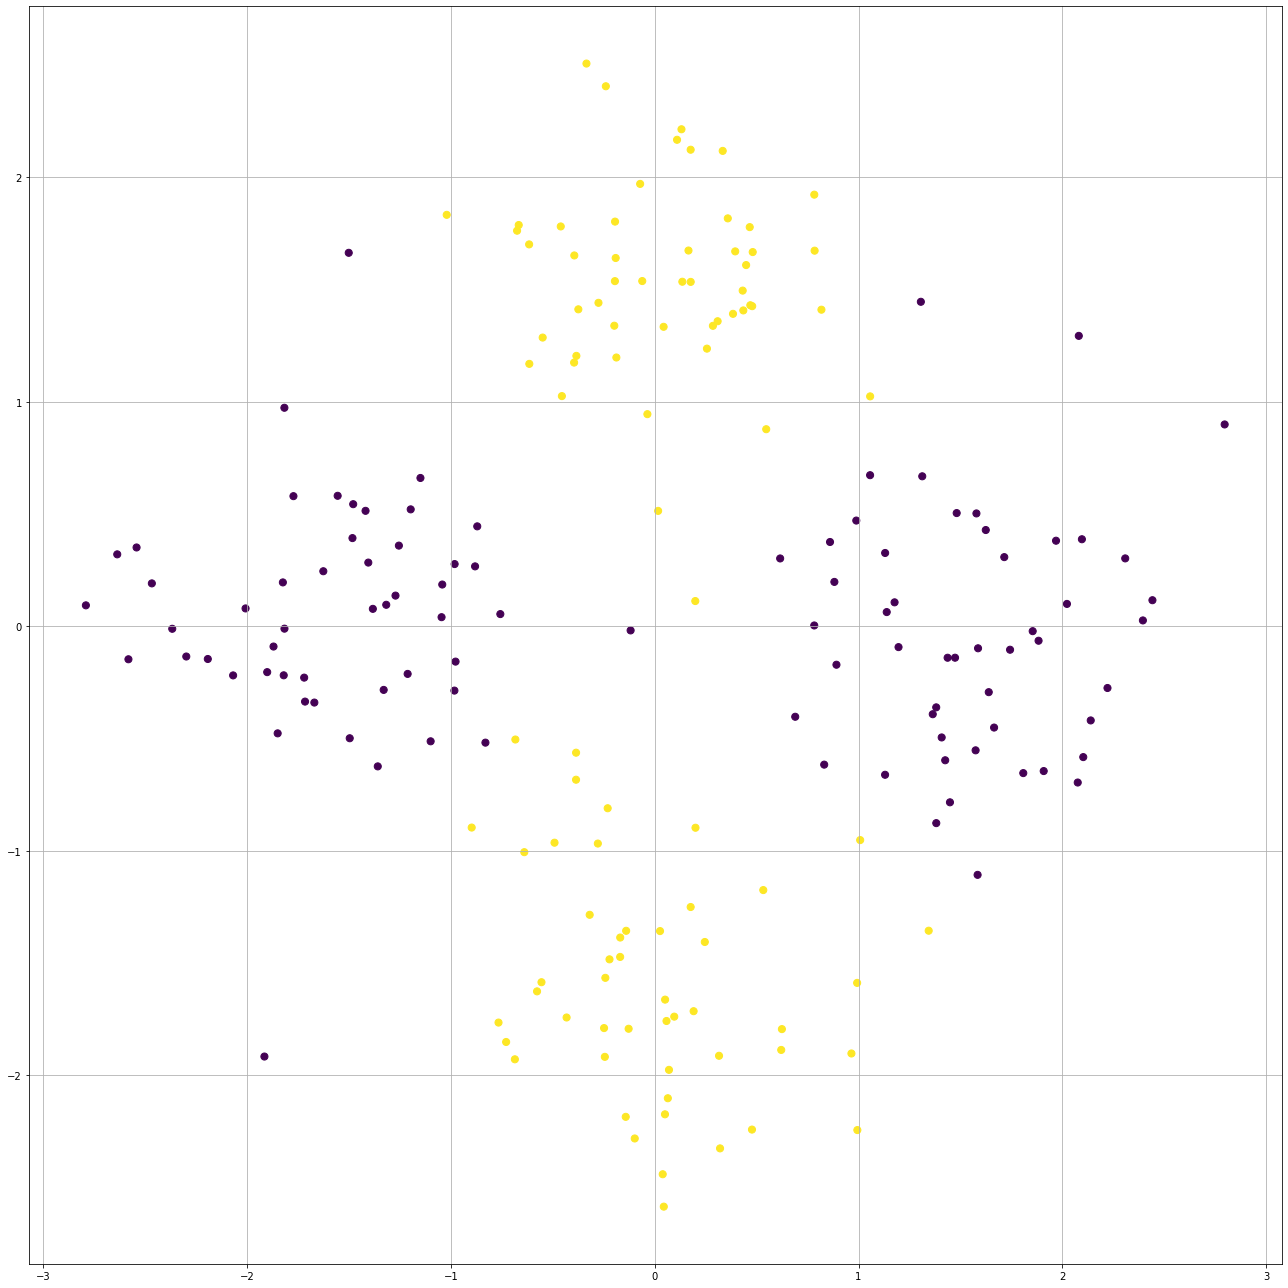

In [50]:
%run ../scripts/_nn_II_load_data.py

<code>**Koks yra savybių erdvės matmuo?**</code>. Tarkime, kad naudotume tik <code>**50 x 50**</code> pikselių mažus vaizdus. Taigi turėtume 2500 pikselių, taigi mūsų <code>**n = 2500**</code>, jei RGB spalvų erdvėje, tada nx3 <code>**n = 7500**</code>.
Mūsų savybių vektorius x yra visų pikselių ryškumo verčių nuo 0 iki 255 sąrašas. <br>

Taigi, jei kursime netiesinę hipotezę įtraukdami visas kvadratinės išraiškas, tai yra visi formos <code>**(𝑥𝑖 * 𝑥𝑗) ≈ 3 mln. savybių**</code>. Ir tai tiesiog per yra per daug kad galėtume efektyviai tai panduooti. Mūsų skaičiavimai būtų labai brangus sukurti ir apdoroti visas šias <code>**3 mln. savybių viename duomenų pavyzdyje**</code>.

<div class="alert alert-block alert-success">

<h2>Klasės pratybos</h2>

Tarkime kuriate algoritmą atpažinti automobilius ir turi 100 pavyzdžių, 100x100 pikselių paveiksliukų (greyscale spektre, ne RGB). Savybės turi būti pikselių intensyvumo reikšmės. Jei apmokysite logistinę regresiją, ir  savybės įtrauksite visus kvadratinius terminus <code>**(𝑥𝑖 * 𝑥𝑗)**</code>, kiek savybių turėsite?
    
 * <code>**5000**</code>
 * <code>**100 000**</code>
 * <code>**5 million**</code>
 * <code>**10 billion**</code>
</div>

\begin{multline*}
X \in \mathbf{R}^{m \times n}
\end{multline*}

In [114]:
one_sample_feature_space = 100*100

In [116]:
one_sample_feature_space

10000

In [115]:
quadratic_terms = one_sample_feature_space**2
quadratic_terms

100000000

In [117]:
all = quadratic_terms * 100

In [118]:
all

10000000000

In [ ]:
10 000 000 000

Paprasta logistinė regresija pridedant galbūt kvadratinius arba kubinius savybių terminus, tai tiesiog nėra geras būdas algoritmui išmokti sudėtingas netiesinės hipotezes, kai n yra labai didelis. Mes paprasčiausiai turime per daug savybių šiam algoritmui. Taigi <code>**Neuroniniai tinklai**</code> yra daug geresnis būdas išmokti sudėtingų netiesinių hipotezių, net jei n yra be galo didelis.

## Neuroninio tinklo modeliai

Šie modeliai buvo sukurti kaip imituojantys neuronų tinklus smegenyse. Drbtinis neuronas, vadinamas <code>**Perceptronas**</code> buvo sukūrtas šeštajame ir septintajame dešimtmečiuose mokslininko [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt), įkvėptas ankstesnių darbų kuriuos atliko [Warren McCulloch](https://en.wikipedia.org/wiki/Warren_Sturgis_McCulloch) ir [Walter Pitts.](https://en.wikipedia.org/wiki/Walter_Pitts)
Supaprastintame lygmenyje neuronas yra skaičiavimo vienetas, kuris per savo įvesties laidus gauna daugybę įvesčių ir atlieka tam tikrus skaičiavimus, o tada siunčia išvestis per savo aksoną į kitus mazgus arba kitus smegenų neuronus. Neuroninės ląstelės bendrauja mažais elektriniais ir cheminiais impulsais.

Ar mūsų smegenys veikia taip, kaip giliojo mokymosi modeliai? Neįmanoma visiškai tiksliai atsakyti, nes žmonės nežino, kaip tiksliai veikia smegenys. Vis dar daugelis dalykų nėra aiškūs. Tačiau galiu drąsiai teigti, kad mūsų smegenys yra labai sudėtingos ir nors gilusis mokymasis puikiai atlieka tam tikras užduotis, pavyzdžiui, objekto aptikimą, tačiau žmogaus smegenys gali daug daugiau. Mes negalime kol kas atkurti skaitmenoje savo smegenis, kitaip jau turėtume AGI (dirbtinį bendrąjį intelektą). Mūsų smegenys tikėtina gali būti kad naudoją kažkoį algoritmą, pavyzdžiui, atgalinį propagavimą tarp daugelio kitų.

<video controls src="video/cortex.mp4" width="600" height="400" />

[Neuronu skaičius](https://en.wikipedia.org/wiki/List_of_animals_by_number_of_neurons) turi tam tikrą poveikį intelektui. Žvelgdami į šią lentelę galime manyti, kad <code>**Banginis žudikas**</code> yra protingiausias padaras. Žmonės turi 16 milijardų neuronų, o šie banginiai – 43. Taigi ar tik dėl šios savybės esame kažkaip esame protingesni už banginius? Turiu pagrindo manyti, kad intelektas priklauso ne tik nuo neuronų skaičiaus. Beje, yra keletas <code>**natūralios kalbos apdorojimo modelių, kuriuose yra 175 milijardai parametrų (mazgų)**</code>. Taigi ta prasme šie modeliai yra net didesni už žmogaus smegenis, jei parametrus (mazgus) laikysime neuronais. Šie modeliai turi daugiau skaičiavimo pajėgumų nei žmogaus smegenys, tačiau kalba jie ne taip gerai kaip žmonės. Tačiau jie puikiai įsimena informaciją, o mes ne taip gerai įsimename, bet <code>**labai efektyviai ją suprantame.**</code>

### Biologinis neuronas

Šioje paskaitoje kalbėsime apie vieno sluoksnio neuroninius tinklus ir jų taikymą, o vėliau kitoje paskaitoje apžvelgsime daugiasluoksnius tinklus su daugybe parametrų. Taigi, pradėkime nuo neuronų modelio, biologinio neurono skaičiavimo modelio.

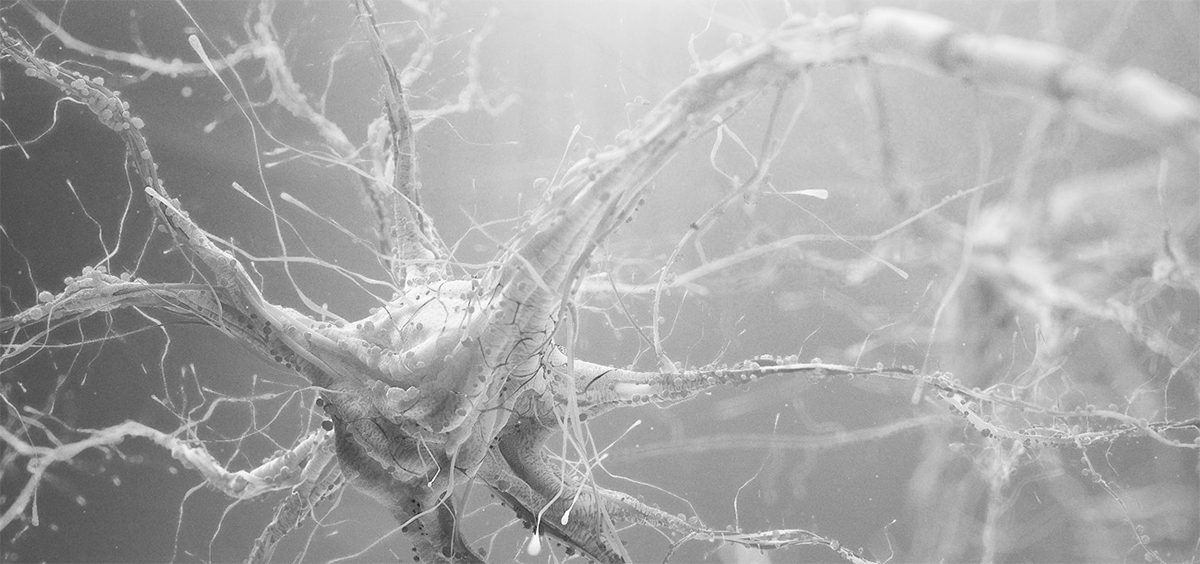

Ankstyviausią matematinį neuronų modelį sukūrė [McCulloch and Pitt in paper about](https://home.csulb.edu/~cwallis/artificialn/History.htm) <code>**Logical calculus of the ideas immanent in nervous activity**</code> 1943

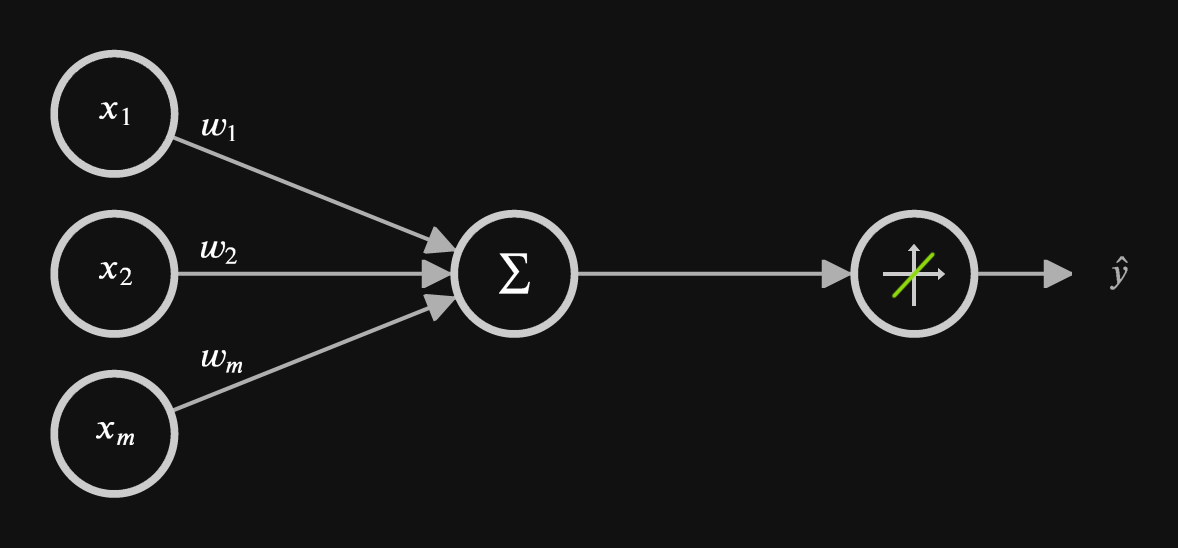

\begin{multline*}
x = 
\begin{bmatrix}
x_1 \\
x_2 \\
x_m
\end{bmatrix},
\
w = 
\begin{bmatrix}
w_{1} \\
w_{2} \\
w_{m}
\end{bmatrix}
\end{multline*}

\begin{multline*}
h_{w}(x^) = w{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} = w^{\top} x^{i}
\end{multline*}

\begin{multline*}
h_{w}(x) = w^{\top}x 
\end{multline*}


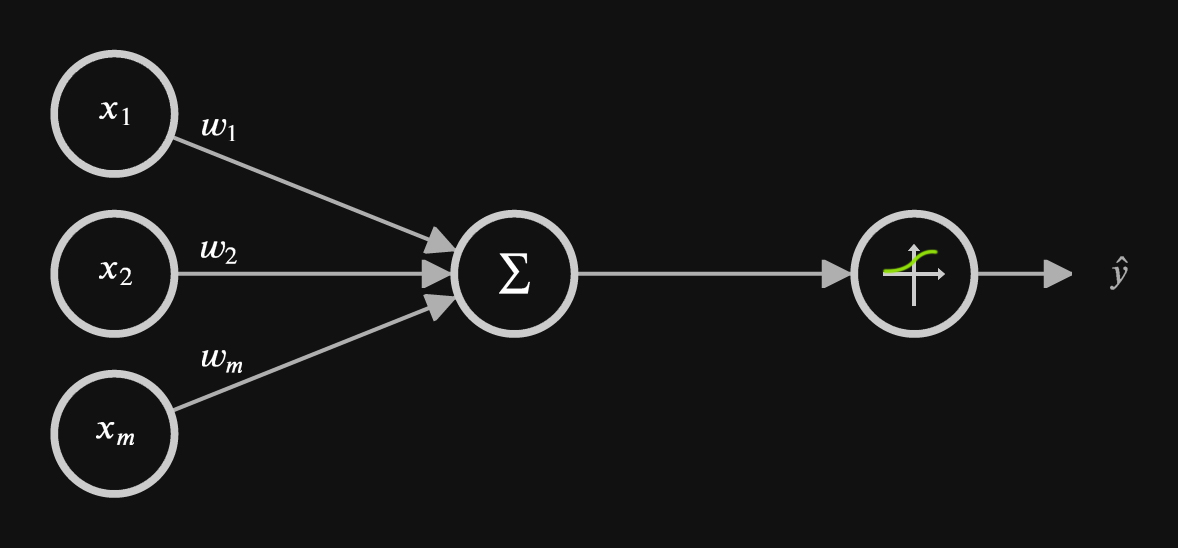

X yra mūsų įvestis , mes turime tam tikrus svorius/parametrus (w), turime grynosios įvesties funkciją kaip branduolį, kur signalas integruojamas į <code>**svertinę sumą**</code>, kur įvestis padauginama iš svorių ir sudedama į bendrą reikšmę. DL mes tai vadiname <code>**pre-aktyvacija**</code> ir žymime raide <code>**z**</code>. Tada ši reikšmė perduodama slenksčio funkcijai ir, jei reikšmė pasiekia tam tikrą slenkstį, perduodamas atitinkamas signalas.

\begin{multline*}
x = 
\begin{bmatrix}
x_1 \\
x_2 \\
x_m
\end{bmatrix},
\
w = 
\begin{bmatrix}
w_{1} \\
w_{2} \\
w_{m}
\end{bmatrix}
\end{multline*}

\begin{multline*}
z = w^{\top}x
\end{multline*}

\begin{multline*}
h_{w}(x) = g(z) = \dfrac{1}{1+e^{-z}} 
\end{multline*}

\begin{multline*}
\hat{y} \in (0,1)
\end{multline*} 

## Neuronas kaip loginis operatorius

Peceptronai (neuronai) yra taikomi kaip <code>**loginių operatorių funkcijos**</code> , dažniausiai iš jų yra <code>**AND**</code>, <code>**OR** </code> ir <code>**NOT**</code> operatoriai. Vėliau pamatysime, ką daryti su sunkiai suprantamu operatoriumi <code>**XOR**</code>. Pagalvokite apie <code>**x1 ir x2**</code> kaip įvestis ir <code>**y**</code> kaip išvestį.

### AND loginis vienetas

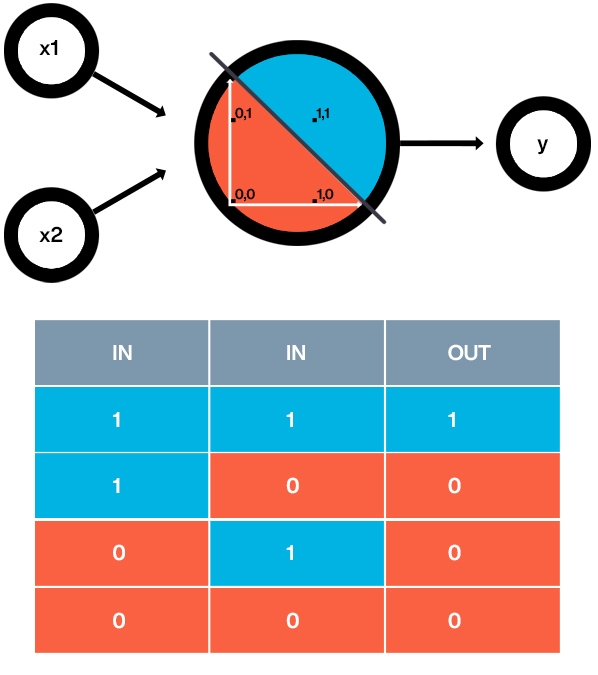

### OR loginis vienetas

OR perceptronas yra labai panašus į AND perceptroną. Žemiau esančiame paveikslėlyje OR perceptronas turi tą pačią sprendimo liniją kaip ir IR perceptronas, išskyrus tai, kad linija yra paslinkta žemyn.

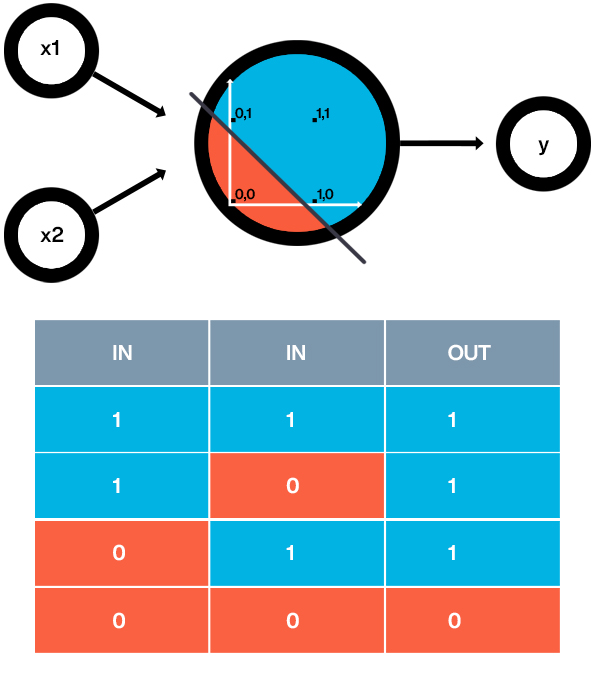

<div class="alert alert-block alert-success">
<h2>Klasės pratybos</h2>
Kokie yra AND perceptrono svoriai ir poslinkis? (svoris , w -  θ1, poslinkis , b - θ0)
    
Nustatykite <code>**svorius w1, w2 ir poslinkį b**</code> į vertes, kurios teisingai atliks operaciją AND, kaip parodyta aukščiau. 
</div>

In [53]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
w1 = 0.0
w2 = 0.0
b  = 0.0

test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = w1 * test_input[0] + w2 * test_input[1] + b
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])


num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Puiku!  Visi parametrai nustatyti teisingai.\n')
else:
    print(f'Yra {num_wrong} klaidos !\n')
print(output_frame.to_string(index=False))

Yra 3 klaidos !

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.0                    1           No
       0          1                   0.0                    1           No
       1          0                   0.0                    1           No
       1          1                   0.0                    1          Yes


<div class="alert alert-block alert-success">
<h2>Klasės pratimas</h2>
Kokie yra du būdai, kaip pakeisti AND perceptroną į OR perceptroną?  <br> 
    
 -<code>**Padinti visus svorius**</code><br> 
 -<code>**Sumažinti visus svorius**</code><br> 
 -<code>**Padidinti vieną svorį**</code><br> 
 -<code>**Sumažinti vieną svorį**</code><br> 
 -<code>**Padidinti poslinkį**</code><br> 
 -<code>**Sumažinti poslinkį**</code>   
</div>

### NOT loginis vienetas

Skirtingai nuo kitų perceptronų, kuriuos aptarėme, operacijai NOT rūpi tik viena įvestis. Operacija grąžina `0`, jei įvestis yra `1`, ir `1`, jei įvestis yra '0'. Kiti įėjimai į perceptroną nepaisomi.

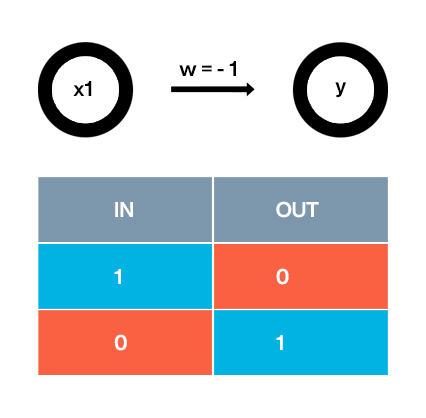

In [54]:
import pandas as pd
# TODO: Set weight1, weight2, and bias
w1 = 0.0
w2 = 0.0
b  = 0.0

test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = w1 * test_input[0] + w2 * test_input[1] + b
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Puiku!  Visi parametrai nustatyti teisingai.\n')
else:
    print(f'Yra {num_wrong} klaidos !\n')
print(output_frame.to_string(index=False))

Yra 2 klaidos !

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.0                    1          Yes
       0          1                   0.0                    1           No
       1          0                   0.0                    1          Yes
       1          1                   0.0                    1           No


### XOR neuronas

Atsakymas, kodėl šiais laikais turime DL ir neapstojome su perceptronais ir adaline, yra tas, kad jie gali išmokti tik labai paprastas sprendimų ribas, vadinamąsias dvejetaines sprendimų ribas. Kai turime <code>**XOR**</code> išskirtinę OR problemą. Tai gali atrodyti kaip paveikslėlis žemiau. Duomenų taškai atrodo taip, lyg jie būtų išdėstyti X formoje. Dvejetainis klasifikatorius šios problemos išspręsti negalėtų. Tiesiog pabandykite nubrėžti linijinę kaip sprendimo ribą. Ir jūs sužinosite, kad nėra jokio būdo, kaip galėtume teisingai klasifikuoti šiuos taškus naudodami dvejetainį klasifikatorių. Šis apribojimas iš tikrųjų pradėjo pirmąją taip vadinamąją `AI žiemą` ir žmonės prarado susidomėjo neuroninių tinklų tyrimais. 

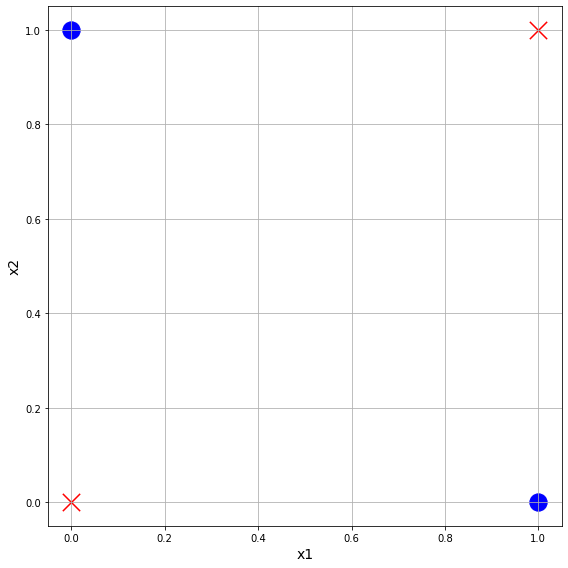

In [92]:
%run ../scripts/_nn_III_load_data.py

In [93]:
# x1, x2
points = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

Yra būdų sukurti neuroninius tinklus, kurie galėtų išspręsti šią problemą. Sujungę <code>**AND, NOT, OR vienetus**</code> galime sukurti <code>**XOR loginį vienetą**</code>

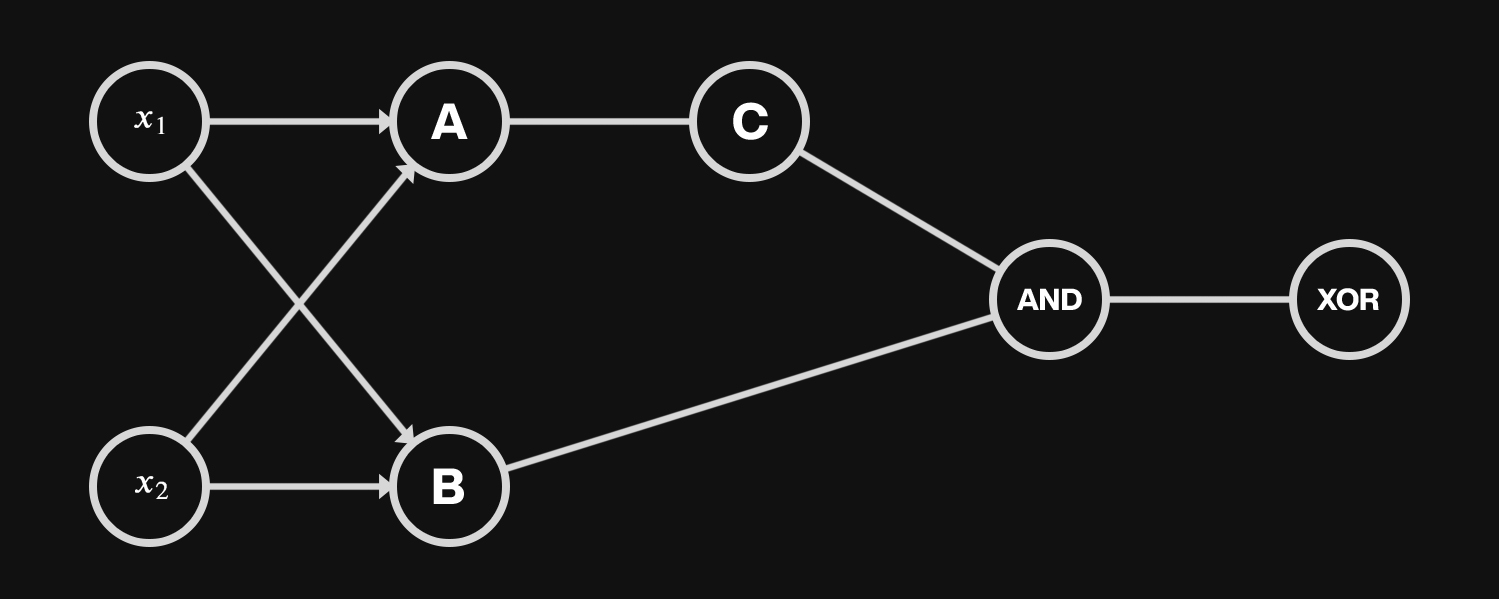

<div class="alert alert-block alert-success">
<h2>Klasės darbas</h2>
Šiame neuroniniame tinkle yra nežinomi 3 neuronai A, B ir C. Paskutinis jau nustatytas kaip AND loginis vienetas. Įvestis į neuroninį tinklą yra iš pirmojo mazgo. Išvestis išeina iš paskutinio mazgo AND. Čia pateiktas daugiasluoksnis perceptronas kuris turi būti XOR loginis operatorius . Kiekvienas nepažymėtas neuronas A, B ir C gali būti loginė AND, OR ir NOT operacija. Tolesnėje uždavininyje nustatykite teisingas šių A, B ir C loginių vienetų operacijas, kad apskaičiuotumėte XOR.
</div>